# Vinho Verde - Exercise

We just performed linear regression involving two variables. Almost all the real-world problems that you are going to encounter will have more than two variables (multiple linear regression).

In this exercise we will use a dataset with variants of the Portuguese *Vinho Verde* wine. We will take into account various input features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Based on these features we will try to predict the quality of the wine.

Saturday I am receiving friends for dinner. I would like to offer my guests a glass of wine. I am currently shopping and I've got my eye on the next bottle of wine from Portugal. *(It is unbelievable what information can be found on a wine label these days)*

<table>
    <tr>
        <td>
            volatile acidity: 0.650<br />
            citric acid: 0.00<br />
            residual sugar: 1.2<br />
            chlorides: 0.089<br />
            free sulfur dioxide: 21.0<br />
            density: 1.3946<br />
            pH: 3.39<br />
            sulphates: 0.53<br />
            alcohol: 9.6<br />
        </td>
        <td>
            <img src="./resources/calamares.jpg"  style="height: 250px"/>
        </td>
    </tr>
</table>

Would this wine be a good choice? Can you help me?

## 1. Import and read the data

Import all the required libraries :

In [85]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

Import the file *winequality.csv* using Pandas.

In [86]:
#Import the file *winequality.csv* using Pandas.

df = pd.read_csv('resources/winequality.csv', sep=',')

## 2. Explore the data

Can you check the number of rows and columns in our dataset?

In [87]:
# Can you check the number of rows and columns in our dataset?
print(df.shape)
df.head()


(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


What features of the wines are included in the data?

In [92]:
# What features of the wines are included in the data?


print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

Can you print the quality of the first 25 wines? What values are being used?

In [94]:
df.head(12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Can you print all different values and count them?

In [95]:
#Can you print all different values and count them?



quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


Can you check on a 2-D graph if there's any relationship between the fixed acidity and the pH of the wine?

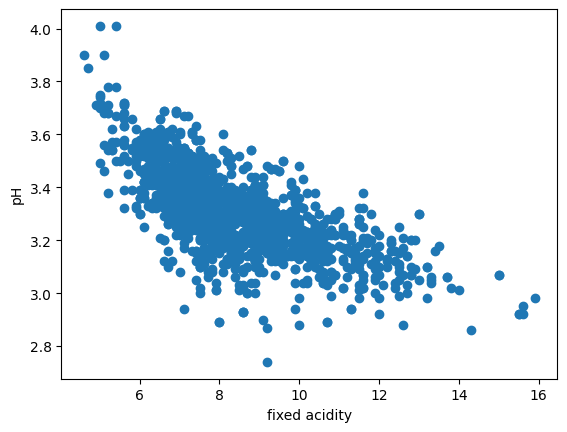

In [96]:
# Can you check on a 2-D graph if there's any relationship between the fixed acidity and the pH of the wine?

import matplotlib.pyplot as plt
plt.scatter(df['fixed acidity'], df['pH'])
plt.xlabel('fixed acidity')
plt.ylabel('pH')
plt.show()





What can you see in the graph? The higher the fixed acidity, the ... the pH. You shoudn't be surprised, since pH is a scale used to specify how acidic a fluid is.

## 3. Histograms

Let’s check the quality of the wines. Create a histogram. What qualities occur the most?

## 4. Data splicing

Our next step is to divide the data into independent variables and dependent variables, whose values are to be predicted. To make the predictions we are only using the following independent variables

- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- density
- pH
- sulphates
- alcohol

to predict the quality. Create the two datasets and next, split 80% of the data to the training set and 20% to the test set.

Print the independent and dependent training set.

## 5. Train the model

Now train the model.

In the case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. To see what coefficients our regression model has chosen, execute the following script:

In [89]:
coefficients = model.coef_.reshape(9,-1)
variables = np.array([['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]).reshape(9,-1)

coeff = pd.DataFrame(coefficients, variables)

print(coeff)

NameError: name 'model' is not defined

This means that for a unit increase in *density*, there is an increase of 5.17 units in the quality of the wine. Similarly, a unit decrease in *chlorides* results in an increase of 1.85 units in the quality of the wine. 

## 6. Predictions

Now that we have trained our model, it’s time to make some predictions. Do the prediction on test data.

Print the actual and predicted values for the first 25 wines from the test set.

Visualize the comparison result as a bar graph. Take only the first 10 results.

The final step is to evaluate the performance of the algorithm. Since R² = 1 corresponds to the perfect fit, what can you conclude?

In [ ]:
# answer: value of R²?
# ok?

Finaly can you predict the quality of my wine (details above)? Is it a good wine according to our model?

In [ ]:
# answer: quality of wine?
#